In [1]:
import json
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_style('whitegrid')
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 100)

In [2]:
#source - https://fantasy.premierleague.com/drf/bootstrap-static
with open('data1.json') as data_file:    
    data = json.load(data_file)

In [3]:
for i, j in data.items():
    pprint(i)

'total-players'
'events'
'element_types'
'teams'
'stats'
'watched'
'game-settings'
'stats_options'
'elements'
'current-event'
'next_event_fixtures'
'last-entry-event'
'player'
'entry'
'phases'
'next-event'


In [4]:
data['stats_options']

[{'key': 'total_points', 'name': 'Total score'},
 {'key': 'event_points', 'name': 'Round score'},
 {'key': 'now_cost', 'name': 'Price'},
 {'key': 'selected_by_percent', 'name': 'Teams selected by %'},
 {'key': 'minutes', 'name': 'Minutes played'},
 {'key': 'goals_scored', 'name': 'Goals scored'},
 {'key': 'assists', 'name': 'Assists'},
 {'key': 'clean_sheets', 'name': 'Clean sheets'},
 {'key': 'goals_conceded', 'name': 'Goals conceded'},
 {'key': 'own_goals', 'name': 'Own goals'},
 {'key': 'penalties_saved', 'name': 'Penalties saved'},
 {'key': 'penalties_missed', 'name': 'Penalties missed'},
 {'key': 'yellow_cards', 'name': 'Yellow cards'},
 {'key': 'red_cards', 'name': 'Red cards'},
 {'key': 'saves', 'name': 'Saves'},
 {'key': 'bonus', 'name': 'Bonus'},
 {'key': 'bps', 'name': 'Bonus Points System'},
 {'key': 'influence', 'name': 'Influence'},
 {'key': 'creativity', 'name': 'Creativity'},
 {'key': 'threat', 'name': 'Threat'},
 {'key': 'ict_index', 'name': 'ICT Index'},
 {'key': 'form

In [5]:
data['game-settings']

{'element_type': {'1': {'bps_clean_sheets': 12,
   'bps_goals_scored': 12,
   'scoring_clean_sheets': 4,
   'scoring_goals_conceded': -1,
   'scoring_goals_scored': 6,
   'squad_max_play': 1,
   'squad_min_play': 1,
   'squad_select': 2,
   'sub_positions_locked': [12],
   'ui_shirt_specific': True},
  '2': {'bps_clean_sheets': 12,
   'bps_goals_scored': 12,
   'scoring_clean_sheets': 4,
   'scoring_goals_conceded': -1,
   'scoring_goals_scored': 6,
   'squad_max_play': 5,
   'squad_min_play': 3,
   'squad_select': 5},
  '3': {'bps_clean_sheets': 0,
   'bps_goals_scored': 18,
   'scoring_clean_sheets': 1,
   'scoring_goals_conceded': 0,
   'scoring_goals_scored': 5,
   'squad_max_play': 5,
   'squad_min_play': 2,
   'squad_select': 5},
  '4': {'bps_clean_sheets': 0,
   'bps_goals_scored': 24,
   'scoring_clean_sheets': 0,
   'scoring_goals_conceded': 0,
   'scoring_goals_scored': 4,
   'squad_max_play': 3,
   'squad_min_play': 1,
   'squad_select': 3}},
 'game': {'bps_assists': 9,
  'b

In [6]:
player_data_json = data['elements']

In [7]:
player_data_df = pd.DataFrame(player_data_json)

In [8]:
pdata = player_data_df.copy()

In [9]:
pdata.head(3)

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,dreamteam_count,ea_index,element_type,ep_next,ep_this,event_points,first_name,form,goals_conceded,goals_scored,ict_index,id,in_dreamteam,influence,loaned_in,loaned_out,loans_in,loans_out,minutes,news,now_cost,own_goals,penalties_missed,penalties_saved,photo,points_per_game,red_cards,saves,second_name,selected_by_percent,special,squad_number,status,team,team_code,threat,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,yellow_cards
0,0,0,18,NaN,None,0,48844,0,0,0,0,0.0,0,0,1,3.4,None,0,David,0.0,4,0,2.9,1,False,28.8,0,0,0,0,143,,50,0,0,0,48844.jpg,1.0,0,4,Ospina,0.2,False,13.0,a,1,3,0.0,2,0,0,0,0,0.0,0.0,Ospina,0
1,0,2,660,NaN,None,12,11334,0,0,0,0,0.1,0,0,1,4.2,None,0,Petr,0.0,37,0,82.0,2,False,819.8,0,0,0,0,3097,,55,1,0,0,11334.jpg,3.8,0,115,Cech,5.6,False,33.0,a,1,3,0.0,134,0,0,0,0,0.0,0.0,Cech,2
2,0,0,35,0.0,None,1,98980,0,0,0,0,0.0,0,0,1,0.0,None,0,Damian Emiliano,0.0,3,0,3.1,3,False,30.6,0,0,0,0,180,Season-long loan to Getafe,40,0,0,0,98980.jpg,4.0,0,5,Martinez,1.3,False,26.0,u,1,3,0.0,8,0,0,0,0,0.0,0.0,Martinez,0


In [10]:
to_drop = ['chance_of_playing_this_round','chance_of_playing_next_round','code','cost_change_event','cost_change_event_fall','cost_change_start','cost_change_start_fall','dreamteam_count','ea_index','ep_this','event_points','form','ict_index','in_dreamteam','loaned_in','loaned_out','loans_in','loans_out','news','photo','special','squad_number','status','transfers_in','transfers_in_event','transfers_out','transfers_out_event','value_form','value_season']

In [11]:
pdata.drop(to_drop, axis=1, inplace = True)

In [12]:
pdata.columns

Index(['assists', 'bonus', 'bps', 'clean_sheets', 'creativity', 'element_type',
       'ep_next', 'first_name', 'goals_conceded', 'goals_scored', 'id',
       'influence', 'minutes', 'now_cost', 'own_goals', 'penalties_missed',
       'penalties_saved', 'points_per_game', 'red_cards', 'saves',
       'second_name', 'selected_by_percent', 'team', 'team_code', 'threat',
       'total_points', 'web_name', 'yellow_cards'],
      dtype='object')

In [13]:
pdata['full_name'] = pdata.first_name + " " + pdata.second_name

In [14]:
pdata['element_type_name'] = pdata.element_type.map({x['id']:x['singular_name_short'] for x in data['element_types']})

In [15]:
pdata = pdata.loc[:,['full_name','first_name','second_name', 'element_type','element_type_name','id','team', 'team_code', 'web_name',
                     'saves','penalties_saved','clean_sheets','goals_conceded',
                     'bonus', 'bps','creativity','ep_next','influence', 'threat',
                     'goals_scored','assists','minutes', 'own_goals',
                     'yellow_cards', 'red_cards','penalties_missed',
                     'selected_by_percent', 'now_cost','points_per_game','total_points']]

In [16]:
pdata['team'] = pdata.team.map({x['id']:x['name'] for x in data['teams']})

In [17]:
pdata.head()

,full_name,first_name,second_name,element_type,element_type_name,id,team,team_code,web_name,saves,penalties_saved,clean_sheets,goals_conceded,bonus,bps,creativity,ep_next,influence,threat,goals_scored,assists,minutes,own_goals,yellow_cards,red_cards,penalties_missed,selected_by_percent,now_cost,points_per_game,total_points
0,David Ospina,David,Ospina,1,GKP,1,Arsenal,3,Ospina,4,0,0,4,0,18,0.0,3.4,28.8,0.0,0,0,143,0,0,0,0,0.2,50,1.0,2
1,Petr Cech,Petr,Cech,1,GKP,2,Arsenal,3,Cech,115,0,12,37,2,660,0.1,4.2,819.8,0.0,0,0,3097,1,2,0,0,5.6,55,3.8,134
2,Damian Emiliano Martinez,Damian Emiliano,Martinez,1,GKP,3,Arsenal,3,Martinez,5,0,1,3,0,35,0.0,0.0,30.6,0.0,0,0,180,0,0,0,0,1.3,40,4.0,8
3,Laurent Koscielny,Laurent,Koscielny,2,DEF,4,Arsenal,3,Koscielny,0,0,10,37,19,723,53.9,0.0,831.2,239.0,2,1,2821,0,4,1,0,0.6,60,3.7,121
4,Per Mertesacker,Per,Mertesacker,2,DEF,5,Arsenal,3,Mertesacker,0,0,0,1,0,5,0.1,2.1,17.8,0.0,0,0,38,0,0,0,0,0.6,50,1.0,1


In [18]:
pdata.corr()['total_points']

element_type        0.040511
id                 -0.087756
team_code          -0.058783
saves               0.213275
penalties_saved     0.113341
clean_sheets        0.889073
goals_conceded      0.753940
bonus               0.875165
bps                 0.940472
goals_scored        0.711255
assists             0.703371
minutes             0.900990
own_goals           0.103359
yellow_cards        0.545764
red_cards           0.129938
penalties_missed    0.292188
now_cost            0.592595
total_points        1.000000
Name: total_points, dtype: float64

In [19]:
pdata.pivot_table(index='element_type_name', values='total_points', aggfunc=np.mean)

element_type_name
DEF    51.744048
FWD    58.542857
GKP    51.229167
MID    54.181395
Name: total_points, dtype: float64

In [20]:
pdata.pivot_table(index='element_type_name', values='total_points', aggfunc=np.median)

element_type_name
DEF    46.5
FWD    49.5
GKP    21.5
MID    43.0
Name: total_points, dtype: float64

In [21]:
pdata.element_type_name.value_counts()

MID    215
DEF    168
FWD     70
GKP     48
Name: element_type_name, dtype: int64

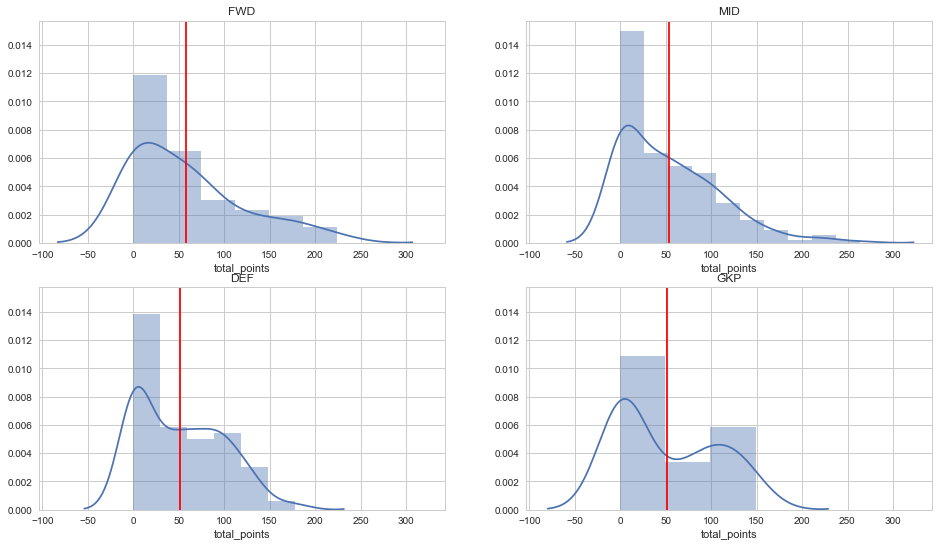

In [22]:
f = plt.figure(figsize=(16,9))

ax1 = f.add_subplot(2,2,1)
ax2 = f.add_subplot(2,2,2,sharex=ax1, sharey=ax1)
ax3 = f.add_subplot(2,2,3,sharex=ax1, sharey=ax1)
ax4 = f.add_subplot(2,2,4,sharex=ax1, sharey=ax1)

ax1.set_title('FWD')
sns.distplot(pdata[pdata.element_type_name=='FWD'].total_points, label='FWD',ax=ax1)
ax1.axvline(np.mean(pdata[pdata.element_type_name=='FWD'].total_points),color='red', label='mean')

ax2.set_title('MID')
sns.distplot(pdata[pdata.element_type_name=='MID'].total_points, label='MID',ax=ax2)
ax2.axvline(np.mean(pdata[pdata.element_type_name=='MID'].total_points),color='red', label='mean')

ax3.set_title('DEF')
sns.distplot(pdata[pdata.element_type_name=='DEF'].total_points, label='DEF',ax=ax3)
ax3.axvline(np.mean(pdata[pdata.element_type_name=='DEF'].total_points),color='red', label='mean')

ax4.set_title('GKP')
sns.distplot(pdata[pdata.element_type_name=='GKP'].total_points, label='GKP',ax=ax4)
ax4.axvline(np.mean(pdata[pdata.element_type_name=='GKP'].total_points),color='red', label='mean')

plt.show()

In [23]:
len(pdata[(pdata.total_points==0)]) / pdata.shape[0]

0.2554890219560878

In [24]:
pdata[(pdata.total_points==0)&(pdata.minutes==0)]

,full_name,first_name,second_name,element_type,element_type_name,id,team,team_code,web_name,saves,penalties_saved,clean_sheets,goals_conceded,bonus,bps,creativity,ep_next,influence,threat,goals_scored,assists,minutes,own_goals,yellow_cards,red_cards,penalties_missed,selected_by_percent,now_cost,points_per_game,total_points
12,Sead Kolasinac,Sead,Kolasinac,2,DEF,13,Arsenal,3,Kolasinac,0,0,0,0,0,0,0.0,3.5,0.0,0.0,0,0,0,0,0,0,0,11.9,60,0.0,0
27,Alexandre Lacazette,Alexandre,Lacazette,4,FWD,28,Arsenal,3,Lacazette,0,0,0,0,0,0,0.0,4.0,0.0,0.0,0,0,0,0,0,0,0,17.6,105,0.0,0
52,Niki MÃ¤enpÃ¤Ã¤,Niki,MÃ¤enpÃ¤Ã¤,1,GKP,53,Brighton,36,MÃ¤enpÃ¤Ã¤,0,0,0,0,0,0,0.0,0.2,0.0,0.0,0,0,0,0,0,0,0,1.5,40,0.0,0
53,Mathew Ryan,Mathew,Ryan,1,GKP,54,Brighton,36,Ryan,0,0,0,0,0,0,0.0,1.1,0.0,0.0,0,0,0,0,0,0,0,0.8,45,0.0,0
54,Lewis Dunk,Lewis,Dunk,2,DEF,55,Brighton,36,Dunk,0,0,0,0,0,0,0.0,0.8,0.0,0.0,0,0,0,0,0,0,0,2.1,45,0.0,0
55,Shane Duffy,Shane,Duffy,2,DEF,56,Brighton,36,Duffy,0,0,0,0,0,0,0.0,0.8,0.0,0.0,0,0,0,0,0,0,0,0.4,45,0.0,0
56,Uwe HÃ¼nemeier,Uwe,HÃ¼nemeier,2,DEF,57,Brighton,36,HÃ¼nemeier,0,0,0,0,0,0,0.0,0.3,0.0,0.0,0,0,0,0,0,0,0,7.7,40,0.0,0
57,Bruno Saltor Grau,Bruno,Saltor Grau,2,DEF,58,Brighton,36,Bruno,0,0,0,0,0,0,0.0,0.8,0.0,0.0,0,0,0,0,0,0,0,0.3,45,0.0,0
58,GaÃ«tan Bong,GaÃ«tan,Bong,2,DEF,59,Brighton,36,Bong,0,0,0,0,0,0,0.0,0.8,0.0,0.0,0,0,0,0,0,0,0,0.1,45,0.0,0
59,Liam Rosenior,Liam,Rosenior,2,DEF,60,Brighton,36,Rosenior,0,0,0,0,0,0,0.0,0.3,0.0,0.0,0,0,0,0,0,0,0,3.3,40,0.0,0


In [25]:
impute_cols = ['saves','penalties_saved', 'clean_sheets', 'goals_conceded', 'bonus', 'bps',
               'creativity', 'influence', 'threat', 'goals_scored','assists', 'minutes', 'own_goals',
               'yellow_cards', 'red_cards','penalties_missed','points_per_game', 'total_points']
positions = set(pdata.element_type_name)
costs = set(pdata.now_cost)
medians = {}
stds = {}

In [26]:
for i in positions:
    medians['{}'.format(i)] = {}
    for c in costs:
        medians['{}'.format(i)]['{}'.format(c)] = {}
        for j in impute_cols:
            if pdata[(pdata.total_points!=0)&(pdata.minutes!=0)&(pdata.element_type_name==str(i))&(pdata.now_cost==c)].shape[0] > 0:
                median = np.median(pdata[(pdata.total_points!=0)&(pdata.minutes!=0)&(pdata.element_type_name==i)&(pdata.now_cost==c)][j].astype(np.float32))
                medians['{}'.format(i)]['{}'.format(c)]['{}'.format(j)] = median
            else:
                medians['{}'.format(i)]['{}'.format(c)]['{}'.format(j)] = 0

In [27]:
for i in positions:
    stds['{}'.format(i)] = {}
    for c in costs:
        stds['{}'.format(i)]['{}'.format(c)] = {}
        for j in impute_cols:
            if pdata[(pdata.total_points!=0)&(pdata.minutes!=0)&(pdata.element_type_name==str(i))&(pdata.now_cost==c)].shape[0] > 0:
                std = np.std(pdata[(pdata.total_points!=0)&(pdata.minutes!=0)&(pdata.element_type_name==i)&(pdata.now_cost==c)][j].astype(np.float32))
                stds['{}'.format(i)]['{}'.format(c)]['{}'.format(j)] = std
            else:
                stds['{}'.format(i)]['{}'.format(c)]['{}'.format(j)] = 0

In [28]:
for idx, row in pdata[(pdata.total_points==0)&(pdata.minutes==0)].iterrows():
    for col in impute_cols:
        pdata.loc[idx,col] = medians[str(row['element_type_name'])][str(row['now_cost'])][str(col)] + np.abs((np.random.randn()/1.5)*stds[str(row['element_type_name'])][str(row['now_cost'])][str(col)])

In [29]:
pdata[pdata.full_name=='Sead Kolasinac']

,full_name,first_name,second_name,element_type,element_type_name,id,team,team_code,web_name,saves,penalties_saved,clean_sheets,goals_conceded,bonus,bps,creativity,ep_next,influence,threat,goals_scored,assists,minutes,own_goals,yellow_cards,red_cards,penalties_missed,selected_by_percent,now_cost,points_per_game,total_points
12,Sead Kolasinac,Sead,Kolasinac,2,DEF,13,Arsenal,3,Kolasinac,0.0,0.0,14.407135,24.225803,11.614244,686.029562,182.64,3.5,697.181,278.434,1.767828,1.732233,3289.754201,0.0,5.774238,0.185038,0.044716,11.9,60,4.43527,154.860625


In [30]:
len(pdata[(pdata.total_points==0)]) / pdata.shape[0]

0.0

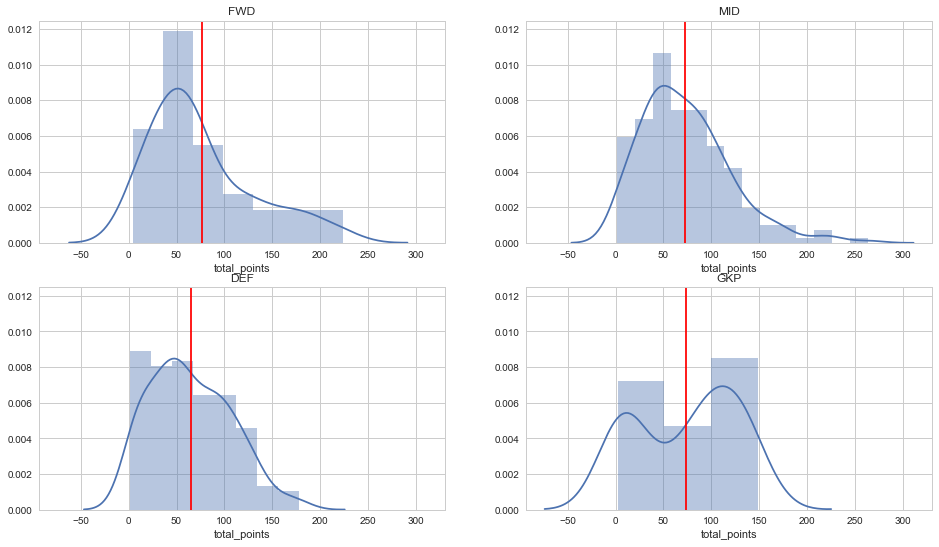

In [31]:
f = plt.figure(figsize=(16,9))

ax1 = f.add_subplot(2,2,1)
ax2 = f.add_subplot(2,2,2,sharex=ax1, sharey=ax1)
ax3 = f.add_subplot(2,2,3,sharex=ax1, sharey=ax1)
ax4 = f.add_subplot(2,2,4,sharex=ax1, sharey=ax1)

ax1.set_title('FWD')
sns.distplot(pdata[pdata.element_type_name=='FWD'].total_points, label='FWD',ax=ax1)
ax1.axvline(np.mean(pdata[pdata.element_type_name=='FWD'].total_points),color='red', label='mean')

ax2.set_title('MID')
sns.distplot(pdata[pdata.element_type_name=='MID'].total_points, label='MID',ax=ax2)
ax2.axvline(np.mean(pdata[pdata.element_type_name=='MID'].total_points),color='red', label='mean')

ax3.set_title('DEF')
sns.distplot(pdata[pdata.element_type_name=='DEF'].total_points, label='DEF',ax=ax3)
ax3.axvline(np.mean(pdata[pdata.element_type_name=='DEF'].total_points),color='red', label='mean')

ax4.set_title('GKP')
sns.distplot(pdata[pdata.element_type_name=='GKP'].total_points, label='GKP',ax=ax4)
ax4.axvline(np.mean(pdata[pdata.element_type_name=='GKP'].total_points),color='red', label='mean')

plt.show()

In [32]:
pdata.pivot_table(index='element_type_name', values='total_points', aggfunc=np.mean)

element_type_name
DEF    64.900549
FWD    76.120022
GKP    73.582699
MID    72.935522
Name: total_points, dtype: float64

In [33]:
pdata.pivot_table(index='element_type_name', values='total_points', aggfunc=np.median)

element_type_name
DEF    58.500000
FWD    60.775188
GKP    89.982046
MID    66.588652
Name: total_points, dtype: float64

# Pulp implementation

In [34]:
from pulp import *

In [35]:
prob = pulp.LpProblem('FantasyTeam', pulp.LpMaximize)

In [36]:
decision_variables = []
for rownum, row in pdata.iterrows():
    variable = str('x' + str(rownum))
    variable = pulp.LpVariable(str(variable), lowBound = 0, upBound = 1, cat= 'Integer') #make variables binary
    decision_variables.append(variable)

print ("Total number of decision_variables: " + str(len(decision_variables)))

Total number of decision_variables: 501


In [37]:
total_points = ""
for rownum, row in pdata.iterrows():
    for i, player in enumerate(decision_variables):
        if rownum == i:
            formula = row['total_points']*player
            total_points += formula

prob += total_points
print ("Optimization function: " + str(total_points))

Optimization function: 2.0*x0 + 134.0*x1 + 32.0*x10 + 132.0*x100 + 105.0*x101 + 123.8091035691972*x102 + 224.0*x103 + 121.0*x104 + 114.0*x105 + 105.0*x106 + 6.0*x107 + 162.0*x108 + 3.0*x109 + 90.0*x11 + 83.0*x110 + 12.0*x111 + 48.0*x112 + 196.0*x113 + 92.0*x114 + 9.05047261426105*x115 + 75.0*x116 + 61.0*x117 + 86.0*x118 + 46.0*x119 + 154.86062512324614*x12 + 51.0*x120 + 6.0*x121 + 47.0*x122 + 98.0*x123 + 92.0*x124 + 149.0*x125 + 93.0*x126 + 24.0*x127 + 91.0*x128 + 7.0*x129 + 264.0*x13 + 116.0*x130 + 42.0*x131 + 18.0*x132 + 136.0*x133 + 102.0*x134 + 89.0*x135 + 68.0*x136 + 135.0*x137 + 133.0*x138 + 104.0*x139 + 122.0*x14 + 9.0*x140 + 69.0*x141 + 127.0*x142 + 54.0*x143 + x144 + 113.0*x145 + 45.0*x146 + 119.0*x147 + 144.0*x148 + 23.0*x149 + 167.0*x15 + 68.0*x150 + 40.264858324748104*x151 + 22.0*x152 + 37.0*x153 + 80.0*x154 + 63.0*x155 + 16.0*x156 + 137.31669921240322*x157 + 17.0*x158 + 133.78299925704712*x159 + 38.0*x16 + 76.0*x160 + 8.282660729187416*x161 + 93.78799955208788*x162 + 38.99

In [38]:
avail_cash = 830
total_paid = ""
for rownum, row in pdata.iterrows():
    for i, player in enumerate(decision_variables):
        if rownum == i:
            formula = row['now_cost']*player
            total_paid += formula

prob += (total_paid <= avail_cash)

In [39]:
avail_gk = 1
total_gk = ""
for rownum, row in pdata.iterrows():
    for i, player in enumerate(decision_variables):
        if rownum == i:
            if row['element_type_name'] == 'GKP':
                formula = 1*player
                total_gk += formula

prob += (total_gk == avail_gk)
print(total_gk)

x0 + x1 + x114 + x115 + x134 + x135 + x136 + x161 + x162 + x188 + x189 + x2 + x212 + x213 + x239 + x240 + x259 + x260 + x261 + x28 + x285 + x286 + x29 + x30 + x304 + x305 + x327 + x328 + x349 + x350 + x374 + x375 + x395 + x396 + x419 + x420 + x437 + x438 + x468 + x472 + x478 + x52 + x53 + x73 + x74 + x93 + x94 + x95


In [40]:
avail_def = 4
total_def = ""
for rownum, row in pdata.iterrows():
    for i, player in enumerate(decision_variables):
        if rownum == i:
            if row['element_type_name'] == 'DEF':
                formula = 1*player
                total_def += formula

prob += (total_def == avail_def)
print(len(total_def))

168


In [41]:
avail_mid = 4
total_mid = ""
for rownum, row in pdata.iterrows():
    for i, player in enumerate(decision_variables):
        if rownum == i:
            if row['element_type_name'] == 'MID':
                formula = 1*player
                total_mid += formula

prob += (total_mid == avail_mid)
print(len(total_mid))

215


In [42]:
avail_fwd = 2
total_fwd = ""
for rownum, row in pdata.iterrows():
    for i, player in enumerate(decision_variables):
        if rownum == i:
            if row['element_type_name'] == 'FWD':
                formula = 1*player
                total_fwd += formula

prob += (total_fwd == avail_fwd)
print(len(total_fwd))

70


In [43]:
team_dict= {}
for team in set(pdata.team_code):
    team_dict[str(team)]=dict()
    team_dict[str(team)]['avail'] = 3
    team_dict[str(team)]['total'] = ""
    for rownum, row in pdata.iterrows():
        for i, player in enumerate(decision_variables):
            if rownum == i:
                if row['team_code'] == team:
                    formula = 1*player
                    team_dict[str(team)]['total'] += formula

    prob += (team_dict[str(team)]['total'] <= team_dict[str(team)]['avail'])
print(len(team_dict))

20


In [56]:
print(team_dict)

{'13': {'total': 1*x188 + 1*x189 + 1*x190 + 1*x191 + 1*x192 + 1*x193 + 1*x194 + 1*x195 + 1*x196 + 1*x197 + 1*x198 + 1*x199 + 1*x200 + 1*x201 + 1*x202 + 1*x203 + 1*x204 + 1*x205 + 1*x206 + 1*x207 + 1*x208 + 1*x209 + 1*x210 + 1*x211 + 1*x257 + 1*x472 + 1*x473 + 0, 'avail': 3}, '20': {'total': 1*x304 + 1*x305 + 1*x306 + 1*x307 + 1*x308 + 1*x309 + 1*x310 + 1*x311 + 1*x312 + 1*x313 + 1*x314 + 1*x315 + 1*x316 + 1*x317 + 1*x318 + 1*x319 + 1*x320 + 1*x321 + 1*x322 + 1*x323 + 1*x324 + 1*x325 + 1*x326 + 1*x499 + 0, 'avail': 3}, '57': {'total': 1*x111 + 1*x395 + 1*x396 + 1*x397 + 1*x398 + 1*x399 + 1*x400 + 1*x401 + 1*x402 + 1*x403 + 1*x404 + 1*x405 + 1*x406 + 1*x407 + 1*x408 + 1*x409 + 1*x410 + 1*x411 + 1*x412 + 1*x413 + 1*x414 + 1*x415 + 1*x416 + 1*x417 + 1*x418 + 1*x485 + 1*x498 + 1*x500 + 1*x91 + 0, 'avail': 3}, '35': {'total': 1*x419 + 1*x420 + 1*x421 + 1*x422 + 1*x423 + 1*x424 + 1*x425 + 1*x426 + 1*x427 + 1*x428 + 1*x429 + 1*x430 + 1*x431 + 1*x432 + 1*x433 + 1*x434 + 1*x435 + 1*x436 + 1*x467

In [44]:
print(prob)

FantasyTeam:
MAXIMIZE
2.0*x0 + 134.0*x1 + 32.0*x10 + 132.0*x100 + 105.0*x101 + 123.8091035691972*x102 + 224.0*x103 + 121.0*x104 + 114.0*x105 + 105.0*x106 + 6.0*x107 + 162.0*x108 + 3.0*x109 + 90.0*x11 + 83.0*x110 + 12.0*x111 + 48.0*x112 + 196.0*x113 + 92.0*x114 + 9.05047261426105*x115 + 75.0*x116 + 61.0*x117 + 86.0*x118 + 46.0*x119 + 154.86062512324614*x12 + 51.0*x120 + 6.0*x121 + 47.0*x122 + 98.0*x123 + 92.0*x124 + 149.0*x125 + 93.0*x126 + 24.0*x127 + 91.0*x128 + 7.0*x129 + 264.0*x13 + 116.0*x130 + 42.0*x131 + 18.0*x132 + 136.0*x133 + 102.0*x134 + 89.0*x135 + 68.0*x136 + 135.0*x137 + 133.0*x138 + 104.0*x139 + 122.0*x14 + 9.0*x140 + 69.0*x141 + 127.0*x142 + 54.0*x143 + 1.0*x144 + 113.0*x145 + 45.0*x146 + 119.0*x147 + 144.0*x148 + 23.0*x149 + 167.0*x15 + 68.0*x150 + 40.264858324748104*x151 + 22.0*x152 + 37.0*x153 + 80.0*x154 + 63.0*x155 + 16.0*x156 + 137.31669921240322*x157 + 17.0*x158 + 133.78299925704712*x159 + 38.0*x16 + 76.0*x160 + 8.282660729187416*x161 + 93.78799955208788*x162 + 38

In [45]:
prob.writeLP('FantasyTeam.lp')

In [46]:
optimization_result = prob.solve()

In [47]:
assert optimization_result == pulp.LpStatusOptimal
print("Status:", LpStatus[prob.status])
print("Optimal Solution to the problem: ", value(prob.objective))
print ("Individual decision_variables: ")
for v in prob.variables():
	print(v.name, "=", v.varValue)

Status: Optimal
Optimal Solution to the problem:  2010.860625123246
Individual decision_variables: 
x0 = 0.0
x1 = 0.0
x10 = 0.0
x100 = 0.0
x101 = 0.0
x102 = 0.0
x103 = 0.0
x104 = 0.0
x105 = 0.0
x106 = 0.0
x107 = 0.0
x108 = 0.0
x109 = 0.0
x11 = 0.0
x110 = 0.0
x111 = 0.0
x112 = 0.0
x113 = 0.0
x114 = 0.0
x115 = 0.0
x116 = 0.0
x117 = 0.0
x118 = 0.0
x119 = 0.0
x12 = 1.0
x120 = 0.0
x121 = 0.0
x122 = 0.0
x123 = 0.0
x124 = 0.0
x125 = 0.0
x126 = 0.0
x127 = 0.0
x128 = 0.0
x129 = 0.0
x13 = 1.0
x130 = 0.0
x131 = 0.0
x132 = 0.0
x133 = 0.0
x134 = 0.0
x135 = 0.0
x136 = 0.0
x137 = 0.0
x138 = 0.0
x139 = 0.0
x14 = 0.0
x140 = 0.0
x141 = 0.0
x142 = 0.0
x143 = 0.0
x144 = 0.0
x145 = 0.0
x146 = 0.0
x147 = 0.0
x148 = 0.0
x149 = 0.0
x15 = 0.0
x150 = 0.0
x151 = 0.0
x152 = 0.0
x153 = 0.0
x154 = 0.0
x155 = 0.0
x156 = 0.0
x157 = 0.0
x158 = 0.0
x159 = 0.0
x16 = 0.0
x160 = 0.0
x161 = 0.0
x162 = 0.0
x163 = 0.0
x164 = 0.0
x165 = 0.0
x166 = 0.0
x167 = 0.0
x168 = 0.0
x169 = 0.0
x17 = 0.0
x170 = 0.0
x171 = 0.0
x172 = 0.0

In [48]:
variable_name = []
variable_value = []

for v in prob.variables():
    variable_name.append(v.name)
    variable_value.append(v.varValue)

df = pd.DataFrame({'variable': variable_name, 'value': variable_value})
for rownum, row in df.iterrows():
    value = re.findall(r'(\d+)', row['variable'])
    df.loc[rownum, 'variable'] = int(value[0])

df = df.sort_index(by='variable')

#append results
for rownum, row in pdata.iterrows():
    for results_rownum, results_row in df.iterrows():
        if rownum == results_row['variable']:
            pdata.loc[rownum, 'decision'] = results_row['value']
            
pdata.head()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:13: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,full_name,first_name,second_name,element_type,element_type_name,id,team,team_code,web_name,saves,penalties_saved,clean_sheets,goals_conceded,bonus,bps,creativity,ep_next,influence,threat,goals_scored,assists,minutes,own_goals,yellow_cards,red_cards,penalties_missed,selected_by_percent,now_cost,points_per_game,total_points,decision
0,David Ospina,David,Ospina,1,GKP,1,Arsenal,3,Ospina,4.0,0.0,0.0,4.0,0.0,18.0,0.0,3.4,28.8,0.0,0.0,0.0,143.0,0.0,0.0,0.0,0.0,0.2,50,1.0,2.0,0.0
1,Petr Cech,Petr,Cech,1,GKP,2,Arsenal,3,Cech,115.0,0.0,12.0,37.0,2.0,660.0,0.1,4.2,819.8,0.0,0.0,0.0,3097.0,1.0,2.0,0.0,0.0,5.6,55,3.8,134.0,0.0
2,Damian Emiliano Martinez,Damian Emiliano,Martinez,1,GKP,3,Arsenal,3,Martinez,5.0,0.0,1.0,3.0,0.0,35.0,0.0,0.0,30.6,0.0,0.0,0.0,180.0,0.0,0.0,0.0,0.0,1.3,40,4.0,8.0,0.0
3,Laurent Koscielny,Laurent,Koscielny,2,DEF,4,Arsenal,3,Koscielny,0.0,0.0,10.0,37.0,19.0,723.0,53.9,0.0,831.2,239.0,2.0,1.0,2821.0,0.0,4.0,1.0,0.0,0.6,60,3.7,121.0,0.0
4,Per Mertesacker,Per,Mertesacker,2,DEF,5,Arsenal,3,Mertesacker,0.0,0.0,0.0,1.0,0.0,5.0,0.1,2.1,17.8,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,0.6,50,1.0,1.0,0.0


In [49]:
pdata[pdata.decision==1].sort_values('element_type')

,full_name,first_name,second_name,element_type,element_type_name,id,team,team_code,web_name,saves,penalties_saved,clean_sheets,goals_conceded,bonus,bps,creativity,ep_next,influence,threat,goals_scored,assists,minutes,own_goals,yellow_cards,red_cards,penalties_missed,selected_by_percent,now_cost,points_per_game,total_points,decision
73,Tom Heaton,Tom,Heaton,1,GKP,74,Burnley,90,Heaton,142.0,1.0,10.000000,48.000000,21.000000,741.000000,30.3,1.4,1001.6,0.0,0.000000,0.000000,3150.000000,0.0,1.000000,0.000000,0.000000,10.4,50,4.3,149.000000,1.0
12,Sead Kolasinac,Sead,Kolasinac,2,DEF,13,Arsenal,3,Kolasinac,0.0,0.0,14.407135,24.225803,11.614244,686.029562,182.64,3.5,697.181,278.434,1.767828,1.732233,3289.754201,0.0,5.774238,0.185038,0.044716,11.9,60,4.43527,154.860625,1.0
96,CÃ©sar Azpilicueta,CÃ©sar,Azpilicueta,2,DEF,97,Chelsea,8,Azpilicueta,0.0,0.0,16.000000,33.000000,22.000000,872.000000,422.8,4.9,792.8,150.0,1.000000,5.000000,3420.000000,0.0,4.000000,0.000000,0.000000,11.5,65,4.5,170.000000,1.0
97,Gary Cahill,Gary,Cahill,2,DEF,98,Chelsea,8,Cahill,0.0,0.0,17.000000,29.000000,15.000000,778.000000,100.8,4.9,831.6,400.0,6.000000,0.000000,3296.000000,1.0,5.000000,0.000000,0.000000,15.8,65,4.8,178.000000,1.0
99,Marcos Alonso,Marcos,Alonso,2,DEF,100,Chelsea,8,Alonso,0.0,0.0,15.000000,19.000000,11.000000,675.000000,420.4,5.3,618.2,536.0,6.000000,5.000000,2693.000000,0.0,2.000000,0.000000,0.000000,13.6,70,5.7,177.000000,1.0
13,Alexis SÃ¡nchez,Alexis,SÃ¡nchez,3,MID,14,Arsenal,3,SÃ¡nchez,0.0,0.0,13.000000,41.000000,32.000000,834.000000,1278.3,0.0,1357.8,1896.0,24.000000,11.000000,3217.000000,0.0,6.000000,0.000000,1.000000,3.7,120,6.9,264.000000,1.0
386,Christian Eriksen,Christian,Eriksen,3,MID,387,Spurs,6,Eriksen,0.0,0.0,16.000000,24.000000,30.000000,798.000000,1679.2,5.0,974.6,1244.0,8.000000,20.000000,3159.000000,0.0,0.000000,0.000000,0.000000,14.8,95,6.1,218.000000,1.0
387,Bamidele Alli,Bamidele,Alli,3,MID,388,Spurs,6,Alli,0.0,0.0,17.000000,22.000000,17.000000,679.000000,778.7,5.0,969.6,1270.0,18.000000,11.000000,3036.000000,0.0,4.000000,0.000000,0.000000,38.9,95,6.1,225.000000,1.0
408,Etienne Capoue,Etienne,Capoue,3,MID,409,Watford,57,Capoue,0.0,0.0,7.000000,60.000000,14.000000,544.000000,696.8,1.0,577.6,513.0,7.000000,2.000000,3204.000000,0.0,5.000000,0.000000,0.000000,8.0,55,3.5,131.000000,1.0
50,Joshua King,Joshua,King,4,FWD,51,Bournemouth,91,King,0.0,0.0,9.000000,54.000000,17.000000,553.000000,474.6,2.5,835.2,1007.0,16.000000,3.000000,2714.000000,0.0,1.000000,0.000000,1.000000,7.0,75,4.9,178.000000,1.0


In [50]:
pdata[pdata.decision==1].now_cost.sum()

830

In [51]:
pdata[pdata.decision==1].total_points.sum()

2010.8606251232461

In [52]:
pdata[pdata.decision==1].sort_values('total_points', ascending=False)

,full_name,first_name,second_name,element_type,element_type_name,id,team,team_code,web_name,saves,penalties_saved,clean_sheets,goals_conceded,bonus,bps,creativity,ep_next,influence,threat,goals_scored,assists,minutes,own_goals,yellow_cards,red_cards,penalties_missed,selected_by_percent,now_cost,points_per_game,total_points,decision
13,Alexis SÃ¡nchez,Alexis,SÃ¡nchez,3,MID,14,Arsenal,3,SÃ¡nchez,0.0,0.0,13.000000,41.000000,32.000000,834.000000,1278.3,0.0,1357.8,1896.0,24.000000,11.000000,3217.000000,0.0,6.000000,0.000000,1.000000,3.7,120,6.9,264.000000,1.0
387,Bamidele Alli,Bamidele,Alli,3,MID,388,Spurs,6,Alli,0.0,0.0,17.000000,22.000000,17.000000,679.000000,778.7,5.0,969.6,1270.0,18.000000,11.000000,3036.000000,0.0,4.000000,0.000000,0.000000,38.9,95,6.1,225.000000,1.0
386,Christian Eriksen,Christian,Eriksen,3,MID,387,Spurs,6,Eriksen,0.0,0.0,16.000000,24.000000,30.000000,798.000000,1679.2,5.0,974.6,1244.0,8.000000,20.000000,3159.000000,0.0,0.000000,0.000000,0.000000,14.8,95,6.1,218.000000,1.0
50,Joshua King,Joshua,King,4,FWD,51,Bournemouth,91,King,0.0,0.0,9.000000,54.000000,17.000000,553.000000,474.6,2.5,835.2,1007.0,16.000000,3.000000,2714.000000,0.0,1.000000,0.000000,1.000000,7.0,75,4.9,178.000000,1.0
97,Gary Cahill,Gary,Cahill,2,DEF,98,Chelsea,8,Cahill,0.0,0.0,17.000000,29.000000,15.000000,778.000000,100.8,4.9,831.6,400.0,6.000000,0.000000,3296.000000,1.0,5.000000,0.000000,0.000000,15.8,65,4.8,178.000000,1.0
99,Marcos Alonso,Marcos,Alonso,2,DEF,100,Chelsea,8,Alonso,0.0,0.0,15.000000,19.000000,11.000000,675.000000,420.4,5.3,618.2,536.0,6.000000,5.000000,2693.000000,0.0,2.000000,0.000000,0.000000,13.6,70,5.7,177.000000,1.0
96,CÃ©sar Azpilicueta,CÃ©sar,Azpilicueta,2,DEF,97,Chelsea,8,Azpilicueta,0.0,0.0,16.000000,33.000000,22.000000,872.000000,422.8,4.9,792.8,150.0,1.000000,5.000000,3420.000000,0.0,4.000000,0.000000,0.000000,11.5,65,4.5,170.000000,1.0
51,Jermain Defoe,Jermain,Defoe,4,FWD,52,Bournemouth,91,Defoe,0.0,0.0,6.000000,63.000000,24.000000,529.000000,274.5,2.0,630.4,1379.0,15.000000,3.000000,3322.000000,0.0,1.000000,0.000000,0.000000,6.1,80,4.5,166.000000,1.0
12,Sead Kolasinac,Sead,Kolasinac,2,DEF,13,Arsenal,3,Kolasinac,0.0,0.0,14.407135,24.225803,11.614244,686.029562,182.64,3.5,697.181,278.434,1.767828,1.732233,3289.754201,0.0,5.774238,0.185038,0.044716,11.9,60,4.43527,154.860625,1.0
73,Tom Heaton,Tom,Heaton,1,GKP,74,Burnley,90,Heaton,142.0,1.0,10.000000,48.000000,21.000000,741.000000,30.3,1.4,1001.6,0.0,0.000000,0.000000,3150.000000,0.0,1.000000,0.000000,0.000000,10.4,50,4.3,149.000000,1.0
